In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('insurance.csv')

In [40]:
data

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000004D556A70C8>,
      dtype=object)

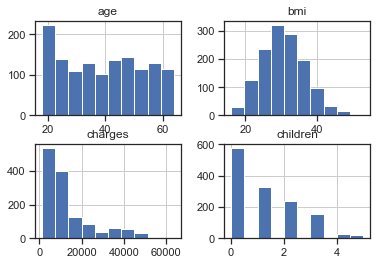

In [42]:
data.hist()

In [43]:
data.groupby('sex').count()

age  bmi  children  smoker  region  charges
sex                                                
female  662  662       662     662     662      662
male    676  676       676     676     676      676

In [44]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [45]:
summary=data.describe()
summary

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

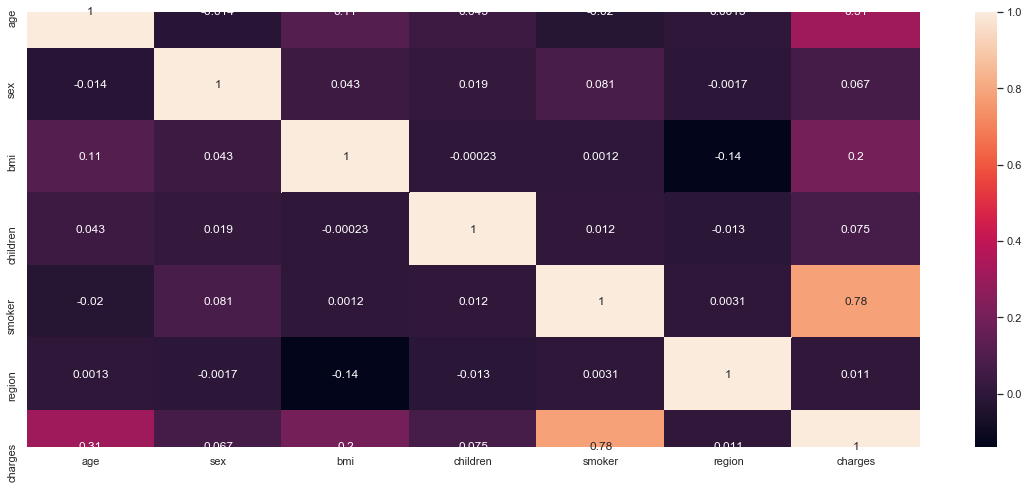

In [69]:
sns.set(rc={'figure.figsize':(20,8)});
sns.heatmap(data.corr(), annot=True)
plt.show()

In [47]:
def distribusi(kolom,data):
    skewness = data.loc[:,kolom].skew()
    print("Kolom {} mempunyai skewness {}.".format(kolom,skewness))
    sns.set(style="ticks")
    f, (ax_box,ax_hist) = plt.subplots(2,sharex=True, figsize=(15,6),
                                      gridspec_kw={"height_ratios":(.15,.85)})
    sns.boxplot(data.loc[~data.loc[:,kolom].isna(),kolom], ax=ax_box, color='r').set_xlabel('')
    sns.distplot(data.loc[~data.loc[:,kolom].isna(),kolom], ax=ax_hist, color='b')
    
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True);

Kolom age mempunyai skewness 0.05567251565299186.


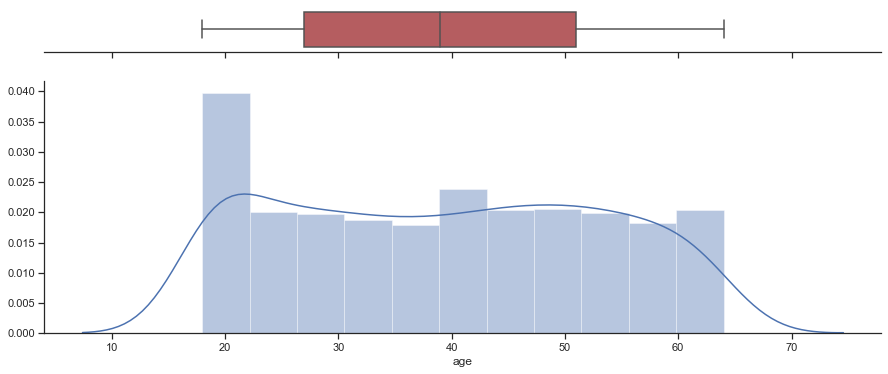

In [48]:
distribusi('age',data)

Kolom bmi mempunyai skewness 0.2840471105987448.


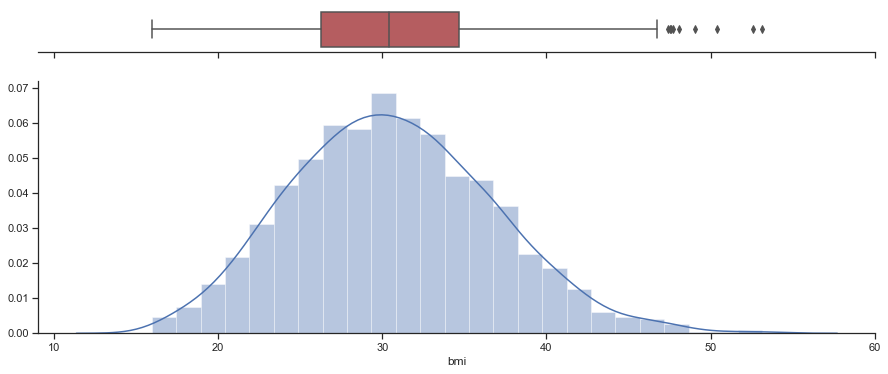

In [49]:
distribusi('bmi',data)

Kolom charges mempunyai skewness 1.5158796580240388.


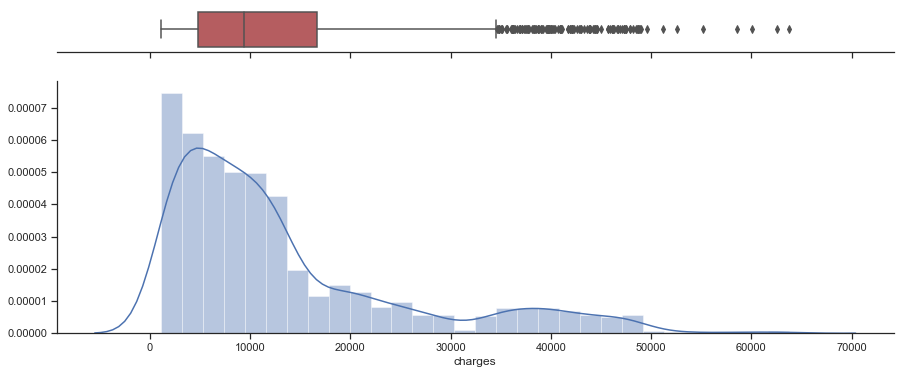

In [50]:
distribusi('charges',data)

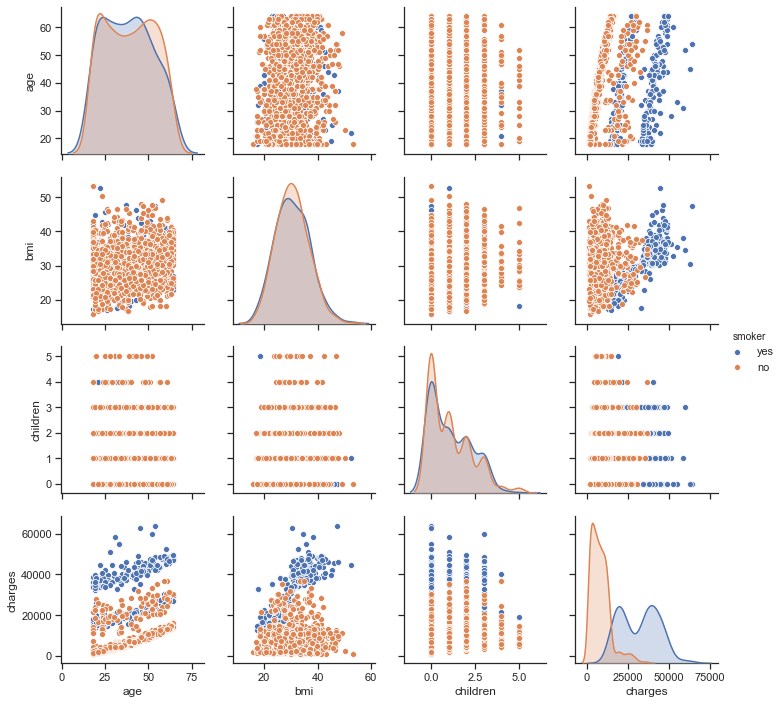

In [51]:
sns.pairplot(data, hue="smoker");

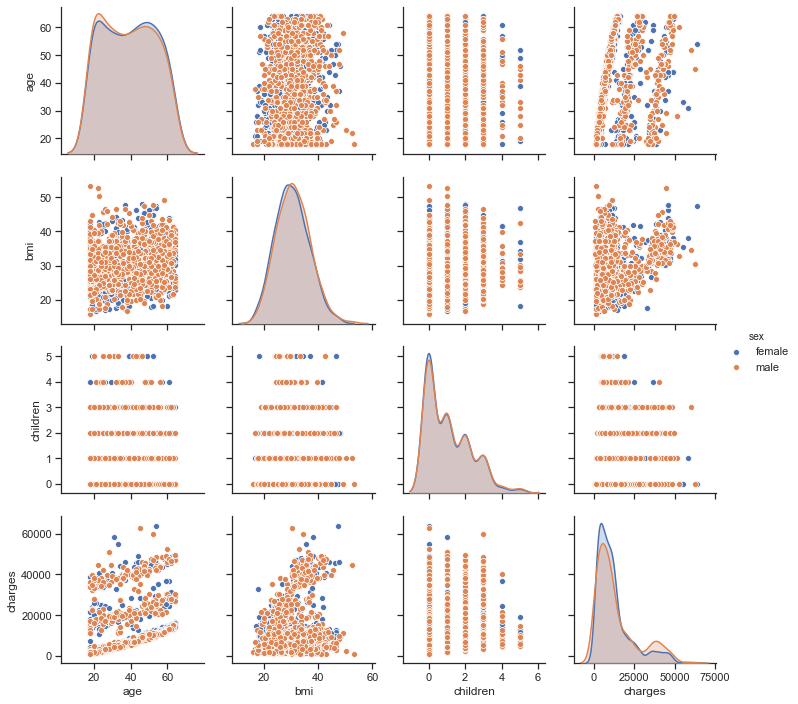

In [52]:
sns.pairplot(data, hue="sex");

In [53]:
summary = data.describe()
Q1_bmi = summary.loc["25%","bmi"]
Q3_bmi = summary.loc["75%","bmi"]
IQR_bmi = Q3_bmi - Q1_bmi
upper_bound = Q3_bmi + IQR_bmi
print("Ada sebanyak {} outlier pada kolom bmi.".format(len(data[data.loc[:,"bmi"]>upper_bound])))
data = data[data.loc[:,"bmi"]<upper_bound]

Ada sebanyak 33 outlier pada kolom bmi.


In [70]:
data['sex'] = data['sex'].map({'male': 1, 'female': 0})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['region'] = data['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

C:\Users\irfanfadhullah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\irfanfadhullah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\irfanfadhullah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

Kolom bmi mempunyai skewness 0.008867361551708195.


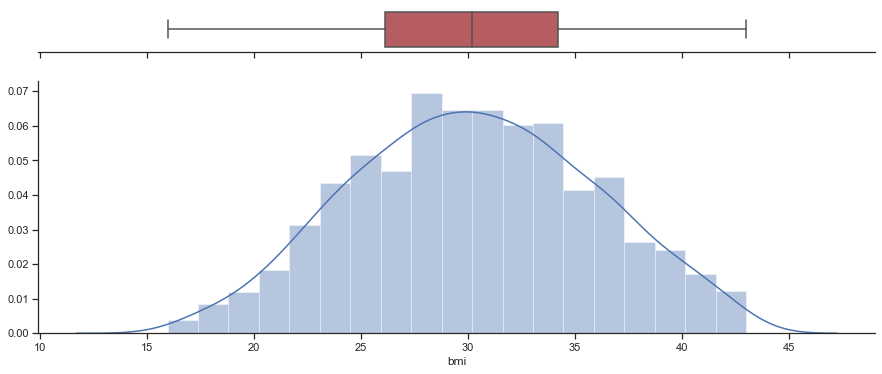

In [55]:
distribusi("bmi",data)

In [56]:
X = data[['age','bmi','smoker']]
y = data['charges']

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 1)

In [72]:
from sklearn.linear_model import LinearRegression
hasil=LinearRegression(copy_X=False,normalize=True)

In [73]:
hasil.fit(X,y)

LinearRegression(copy_X=False, fit_intercept=True, n_jobs=None, normalize=True)

In [74]:
importance = hasil.coef_

In [75]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 259.75828
Feature: 1, Score: 357.15914
Feature: 2, Score: 23384.74739


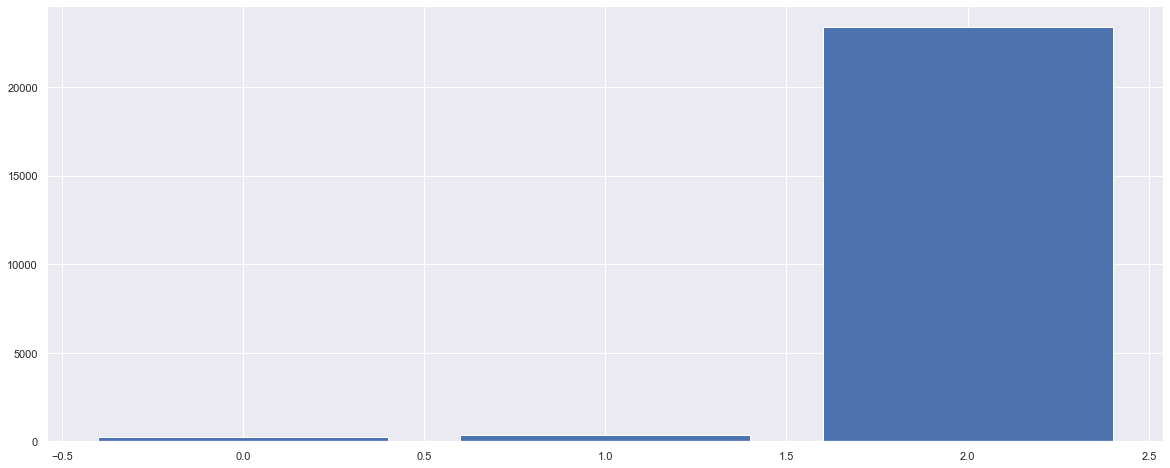

In [76]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [77]:
hasil.fit(X_train, y_train)

LinearRegression(copy_X=False, fit_intercept=True, n_jobs=None, normalize=True)

In [78]:
y_pred = hasil.predict(X_test)

In [79]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4276.996676365547
Mean Squared Error: 37670273.08009565
Root Mean Squared Error: 6137.611349710541


In [80]:
hasil.score(X_test, y_test)

0.7699037320537236

In [81]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual     Predicted
661   22192.43711  10738.387046
1060   1981.58190   5204.067723
164    5028.14660   7668.049351
1036  37484.44930  29548.892130
934    4673.39220   9091.531027
...           ...           ...
1142  27117.99378   9779.419706
917   35069.37452  30337.460035
502   22218.11490  31978.661924
1278  22462.04375  31323.748839
62    30166.61817  12779.220674

[261 rows x 2 columns]

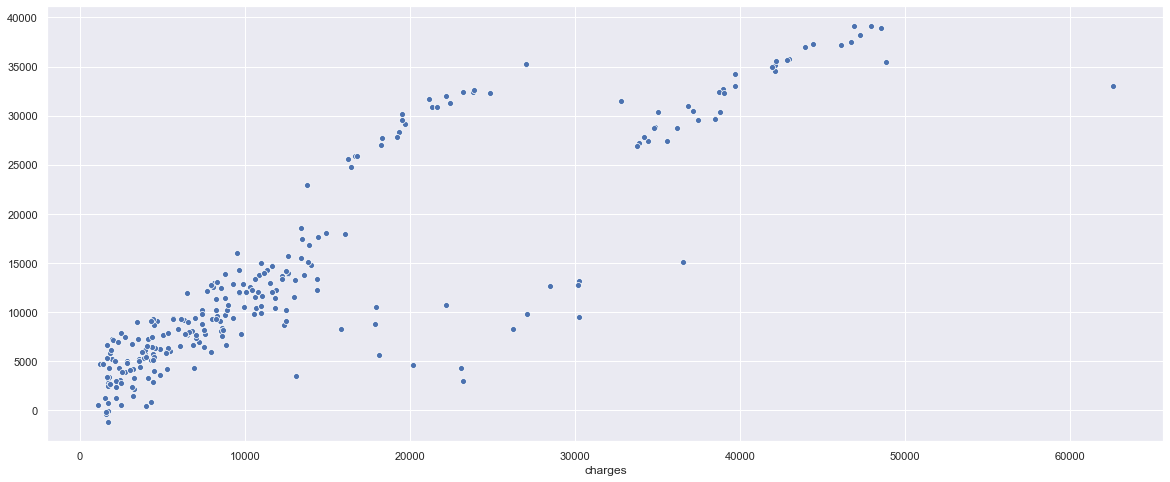

In [82]:
sns.scatterplot(y_test,y_pred)

## Another Version to check Linearity

In [86]:
import statsmodels.regression.linear_model as sm
lm1 = sm.OLS(y_train,X_train).fit()
lm1.params

age         198.647937
bmi          37.477748
smoker    22551.101848
dtype: float64

In [88]:
lin_reg = LinearRegression(normalize=True,n_jobs=-1,copy_X=False)
lin_reg.fit(X_train, y_train)
r2 = lin_reg.score(X_test, y_test)
print(lin_reg.coef_)
print(lin_reg.intercept_)
print('R^2: {0}'.format(r2))

[  254.75308169   357.72507752 23044.24167782]
-12360.785969310085
R^2: 0.7699037320537236


In [89]:
def calculate_residuals(model, features, label):
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [90]:
def linear_assumption(model, features, label):

    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    df_results = calculate_residuals(model, features, label)
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show();

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


C:\Users\irfanfadhullah\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


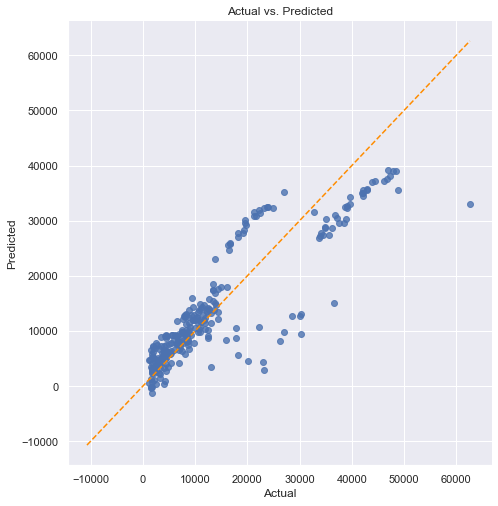

In [92]:
linear_assumption(lin_reg,X_test,y_test);

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 6.299821548956784e-23
Residuals are not normally distributed


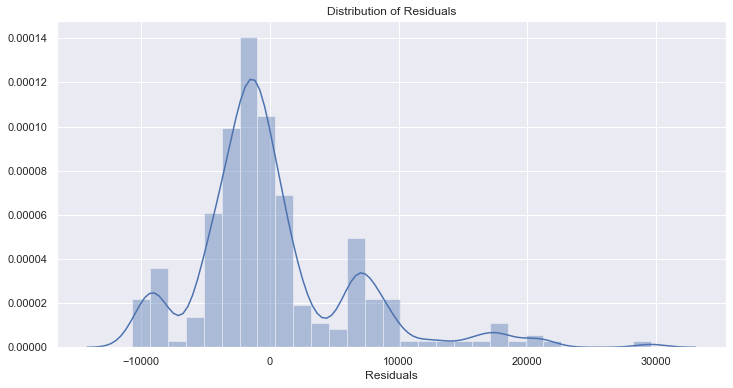


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [93]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')
normal_errors_assumption(lin_reg,X_test,y_test);

Assumption 3: Little to no multicollinearity among predictors


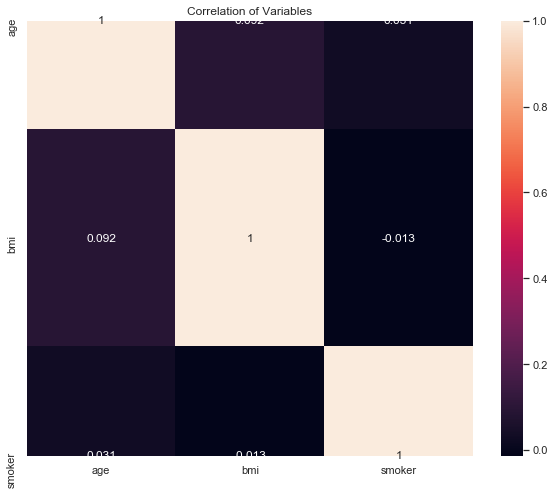

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------


TypeError: '(slice(None, None, None), 0)' is an invalid key

In [94]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')
multicollinearity_assumption(lin_reg,X_test,y_test,['age','bmi','smoker']);

In [95]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')
autocorrelation_assumption(lin_reg,X_test,y_test);

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.169872876336874
Little to no autocorrelation 

Assumption satisfied


Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


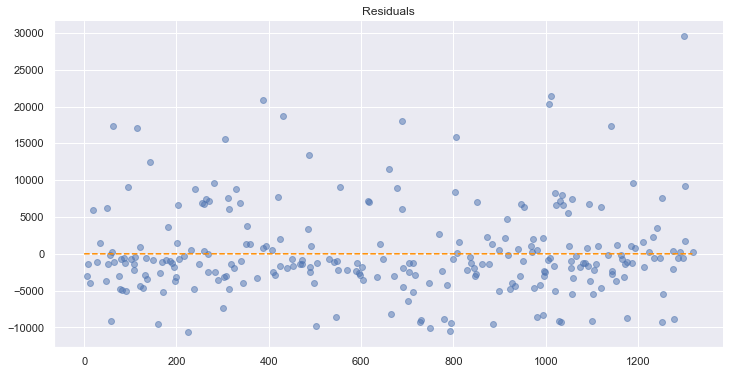

In [96]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()
homoscedasticity_assumption(lin_reg,X_test,y_test);

In [99]:
import math
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, lin_reg.predict(X_test))
mse = metrics.mean_squared_error(y_test, lin_reg.predict(X_test))
print(mae,mse,math.sqrt(mse))

4276.996676365547 37670273.08009565 6137.611349710541
